# Terrorism Around The World

> Kaggle Transcroption(필사)

- https://www.kaggle.com/code/ash316/terrorism-around-the-world/notebook

- https://www.kaggle.com/code/abigaillarion/terrorist-attacks-in-united-states#Data-Import

</br>

## 🎫 1. Getting Data Ready

In [2]:
import pandas as pd

terror_raw = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

terror_raw.rename(
	columns={
		'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'latitude': 'lat', 'longitude': 'lng',
  		'country_txt': 'Country', 'region_txt': 'Region', 'provstate': 'ProvState', 'city': 'City',
		'targtype1_txt': 'target_type', 'targsubtype1_txt': 'target_subtype', 'target1': 'target',
  		'gname': 'perp_group', 'attacktype1_txt': 'attack_type', 'weaptype1_txt': 'weapon'
	}, inplace=True
)

columns = [
	'year', 'month', 'day', 'Country', 'Region', 'ProvState', 'City', 'lat', 'lng', 'nkill', 'nwound',
	'target_type', 'target_subtype', 'target', 'perp_group', 'attack_type', 'weapon', 'suicide', 'success', 'motive',
	'ransom', 'ishostkid', 'nhostkid', 'nhostkidus'
]
terror_raw = terror_raw[columns]
terror_raw.head()

C:\Users\happy\AppData\Local\Temp\ipykernel_28600\1895992022.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror_raw = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


year  month  day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

  ProvState           City        lat         lng  nkill  ...  \
0       NaN  Santo Domingo  18.456792  -69.951164    1.0  ...   
1   Federal    Mexico city  19.371887  -99.086624    0.0  ...   
2    Tarlac        Unknown  15.478598  120.599741    1.0  ...   
3    Attica         Athens  37.997490   23.762728    NaN  ...   
4   Fukouka        Fukouka  33.580412  130.396361    NaN  ...   

                           perp_group                     attack_type  \
0                              MANO-D                   Assassination   
1  23rd of September Communist League     Hostage Taking (Kidnapping)   
2                             Unknown                   Assassination   
3                             Unknown               Bombing/Explosion   
4                             Unknown  Facility/Infrastructure Attack   

       weapon suicide success motive ransom  ishostkid  nhostkid nhostkidus  
0     Unknown       0       1    NaN    0.0        0.0       NaN        NaN  
1     Unknown       0       1    NaN    1.0        1.0       1.0        0.0  
2     Unknown       0       1    NaN    0.0        0.0       NaN        NaN  
3  Explosives       0       1    NaN    0.0        0.0       NaN        NaN  
4  Incendiary       0       1    NaN    0.0        0.0       NaN        NaN  

[5 rows x 24 columns]

In [60]:
terror_raw.loc[terror_raw['nkill'].isnull(), 'nkill'] = 0
terror_raw.loc[terror_raw['nwound'].isnull(), 'nwound'] = 0
terror_raw['casualties'] = terror_raw['nkill'] + terror_raw['nwound']

In [61]:
terror_raw.isnull().sum()

year                   0
month                  0
day                    0
Country                0
Region                 0
ProvState            421
City                 435
lat                 4556
lng                 4557
nkill                  0
nwound                 0
target_type            0
target_subtype     10373
target               638
perp_group             0
attack_type            0
weapon                 0
suicide                0
success                0
motive            131130
casualties             0
dtype: int64

In [4]:
terror_raw.to_csv("./terrorism_db.csv", index=False)

In [62]:
terror = terror_raw.drop(columns=['ProvState', 'target_subtype'])

In [63]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181256 non-null  object 
 6   lat          177135 non-null  float64
 7   lng          177134 non-null  float64
 8   nkill        181691 non-null  float64
 9   nwound       181691 non-null  float64
 10  target_type  181691 non-null  object 
 11  target       181053 non-null  object 
 12  perp_group   181691 non-null  object 
 13  attack_type  181691 non-null  object 
 14  weapon       181691 non-null  object 
 15  suicide      181691 non-null  int64  
 16  success      181691 non-null  int64  
 17  motive       50561 non-null   object 
 18  casualties   181691 non-

In [64]:
terror.isnull().sum()

year                0
month               0
day                 0
Country             0
Region              0
City              435
lat              4556
lng              4557
nkill               0
nwound              0
target_type         0
target            638
perp_group          0
attack_type         0
weapon              0
suicide             0
success             0
motive         131130
casualties          0
dtype: int64

In [8]:
terror[(terror['lat'].isna() | terror['lng'].isna()) & terror['City'].isna()]

year  month  day    Country                      Region City  lat  \
82707   2007      3   28   Thailand              Southeast Asia  NaN  NaN   
86431   2008      4   16    Algeria  Middle East & North Africa  NaN  NaN   
86844   2008      5   12    Algeria  Middle East & North Africa  NaN  NaN   
87172   2008      6    1  Macedonia              Eastern Europe  NaN  NaN   
93646   2009      9   16    Myanmar              Southeast Asia  NaN  NaN   
93647   2009      9   16    Myanmar              Southeast Asia  NaN  NaN   
93665   2009      9   16    Myanmar              Southeast Asia  NaN  NaN   
103120  2011      9   17      Libya  Middle East & North Africa  NaN  NaN   

        lng  nkill  nwound                  target_type  \
82707   NaN    2.0     0.0  Private Citizens & Property   
86431   NaN    1.0     0.0         Government (General)   
86844   NaN    3.0     0.0                     Military   
87172   NaN    0.0     0.0         Government (General)   
93646   NaN    0.0     0.0                      Unknown   
93647   NaN    0.0     0.0                      Unknown   
93665   NaN    0.0     0.0                      Unknown   
103120  NaN    0.0     0.0          Airports & Aircraft   

                                                   target  \
82707             Two women working on royal farm project   
86431                                   A Tuareg Mediator   
86844                                   Algerian soldiers   
87172   Ballot boxes at election polling stations in M...   
93646                 The target of the attack is unkown.   
93647                The target of the attack is unknown.   
93665                The target of the attack is unknown.   
103120                                      Aid airplanes   

                                    perp_group  \
82707                                  Unknown   
86431                                  Unknown   
86844   Al-Qaida in the Islamic Maghreb (AQIM)   
87172                                  Unknown   
93646                                  Unknown   
93647                                  Unknown   
93665                                  Unknown   
103120                                 Unknown   

                           attack_type      weapon  suicide  success  \
82707                    Armed Assault    Firearms        0        1   
86431                          Unknown     Unknown        0        1   
86844                    Armed Assault    Firearms        0        1   
87172   Facility/Infrastructure Attack  Incendiary        0        1   
93646                Bombing/Explosion  Explosives        0        1   
93647                Bombing/Explosion  Explosives        0        1   
93665                Bombing/Explosion  Explosives        0        1   
103120                   Armed Assault    Firearms        0        1   

        casualties  
82707          2.0  
86431          1.0  
86844          3.0  
87172          0.0  
93646          0.0  
93647          0.0  
93665          0.0  
103120         0.0

## 🎫 2. Some Basic Analysis

In [9]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['nkill'].max(),'that took place in',terror.loc[terror['nkill'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [10]:
terror['Country'].value_counts()

Country
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: count, Length: 205, dtype: int64

In [11]:
print(f"테러가 가장 많이 발생한 국가는 {terror['Country'].value_counts().index[0]}이고 " \
      f"테러 발생 건수는 {terror['Country'].value_counts().values[0]}건 이다.")

테러가 가장 많이 발생한 국가는 Iraq이고 테러 발생 건수는 24636건 이다.


In [12]:
terror['Region'].value_counts().to_frame()

count
Region                            
Middle East & North Africa   50474
South Asia                   44974
South America                18978
Sub-Saharan Africa           17550
Western Europe               16639
Southeast Asia               12485
Central America & Caribbean  10344
Eastern Europe                5144
North America                 3456
East Asia                      802
Central Asia                   563
Australasia & Oceania          282

In [13]:
print(f"테러가 가장 많이 발생한 지역은 {terror['Region'].value_counts().index[0]}이고 " \
      f"테러 발생 건수는 {terror['Region'].value_counts().values[0]}건 이다.")

테러가 가장 많이 발생한 지역은 Middle East & North Africa이고 테러 발생 건수는 50474건 이다.


In [14]:
terror['nkill'].max(), terror['nkill'].idxmax()

(1570.0, 133518)

In [15]:
terror.iloc[133518]

year                                                  2014
month                                                    6
day                                                     12
Country                                               Iraq
Region                          Middle East & North Africa
City                                                Tikrit
lat                                              34.621521
lng                                              43.668377
nkill                                               1570.0
nwound                                                 0.0
target_type                                       Military
target                                            Soldiers
perp_group     Islamic State of Iraq and the Levant (ISIL)
attack_type                    Hostage Taking (Kidnapping)
weapon                                            Firearms
suicide                                                  0
success                                                 

In [16]:
terror.loc[terror['nkill'].idxmax()].Country

'Iraq'

In [17]:
terror.groupby(by='year').size().to_frame(name='count').reset_index()

year  count
0   1970    651
1   1971    471
2   1972    568
3   1973    473
4   1974    581
5   1975    740
6   1976    923
7   1977   1319
8   1978   1526
9   1979   2662
10  1980   2662
11  1981   2586
12  1982   2544
13  1983   2870
14  1984   3495
15  1985   2915
16  1986   2860
17  1987   3183
18  1988   3721
19  1989   4324
20  1990   3887
21  1991   4683
22  1992   5071
23  1994   3456
24  1995   3081
25  1996   3058
26  1997   3197
27  1998    934
28  1999   1395
29  2000   1814
30  2001   1906
31  2002   1333
32  2003   1278
33  2004   1166
34  2005   2017
35  2006   2758
36  2007   3242
37  2008   4805
38  2009   4721
39  2010   4826
40  2011   5076
41  2012   8522
42  2013  12036
43  2014  16903
44  2015  14965
45  2016  13587
46  2017  10900

In [18]:
str(terror['year'].value_counts()[2014])

'16903'

◾ 연도별 테러 발생수

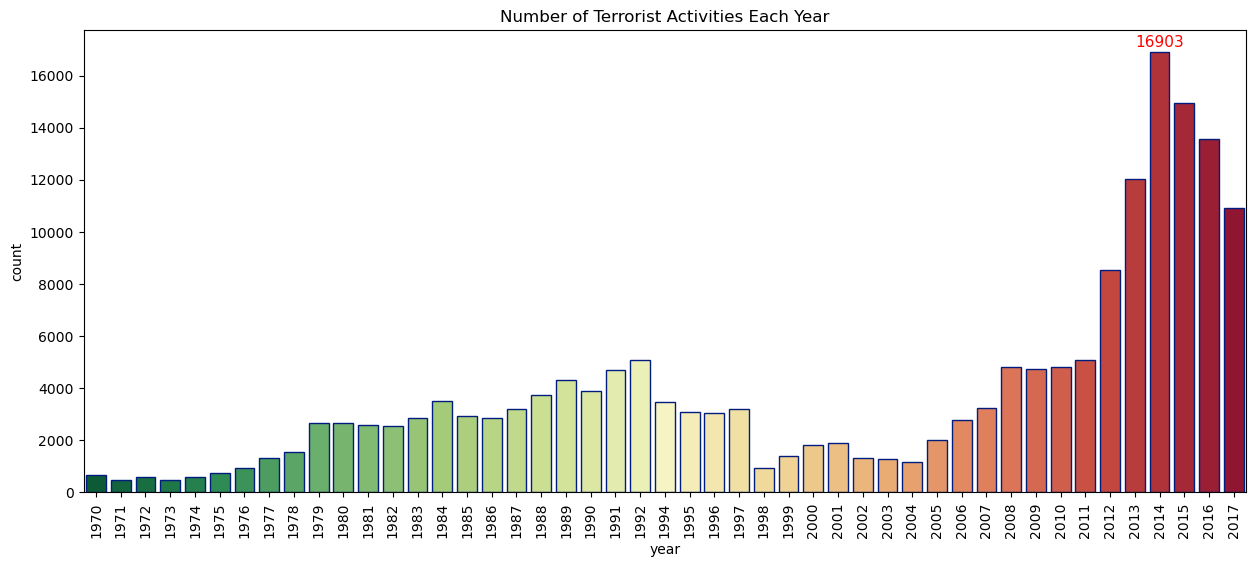

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(data=terror, x='year', hue='year', legend=False, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',7))
plt.text(
	x=43, y=terror['year'].value_counts()[2014]+200, 
 	s=str(terror['year'].value_counts()[2014]), 
  	ha='center', color='red', fontsize=11
)
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

#--> Clearly the number of terrorist activities have gone up sharply after 2000.

◾ 공격 타입별 테러 발생수

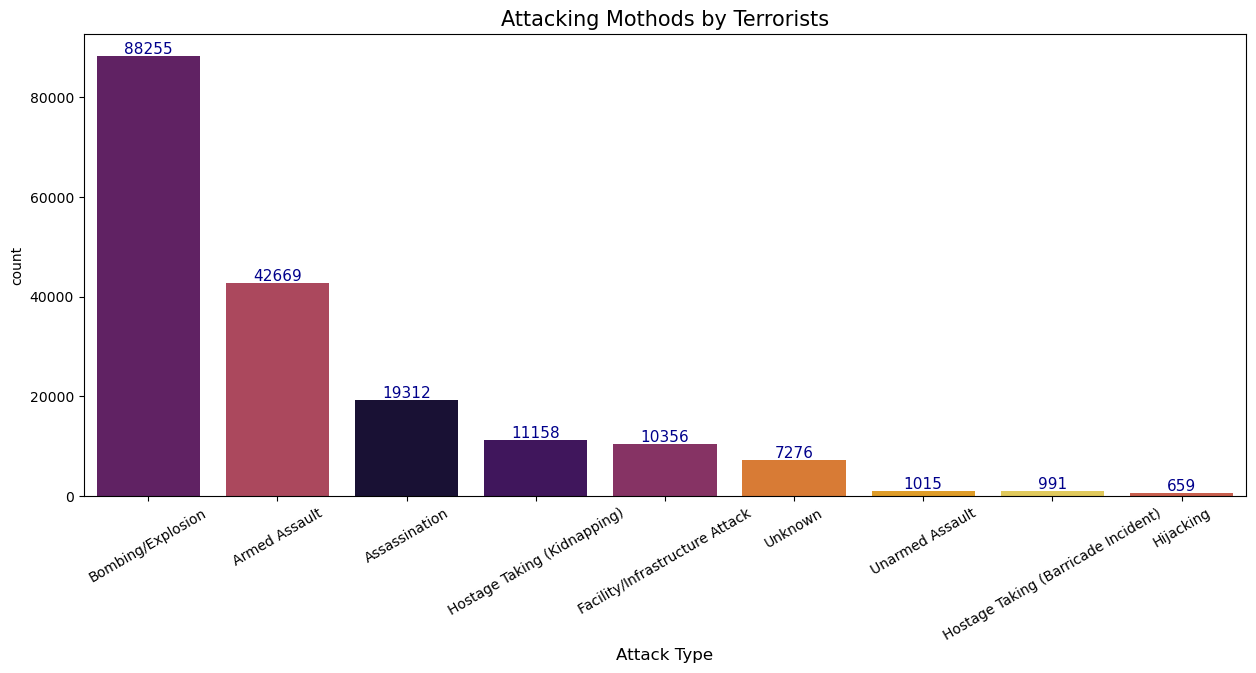

In [20]:
plt.figure(figsize=(15,6))
ax = sns.countplot(
	x='attack_type', data=terror, 
 	hue='attack_type', legend=False, palette='inferno', 
  	order=terror['attack_type'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points',
		fontsize=11, color='darkblue'
	)

plt.xticks(rotation=30)
plt.xlabel('Attack Type', fontsize=12)
plt.title("Attacking Mothods by Terrorists", fontsize=15)
plt.show()

◾ 주요 타겟

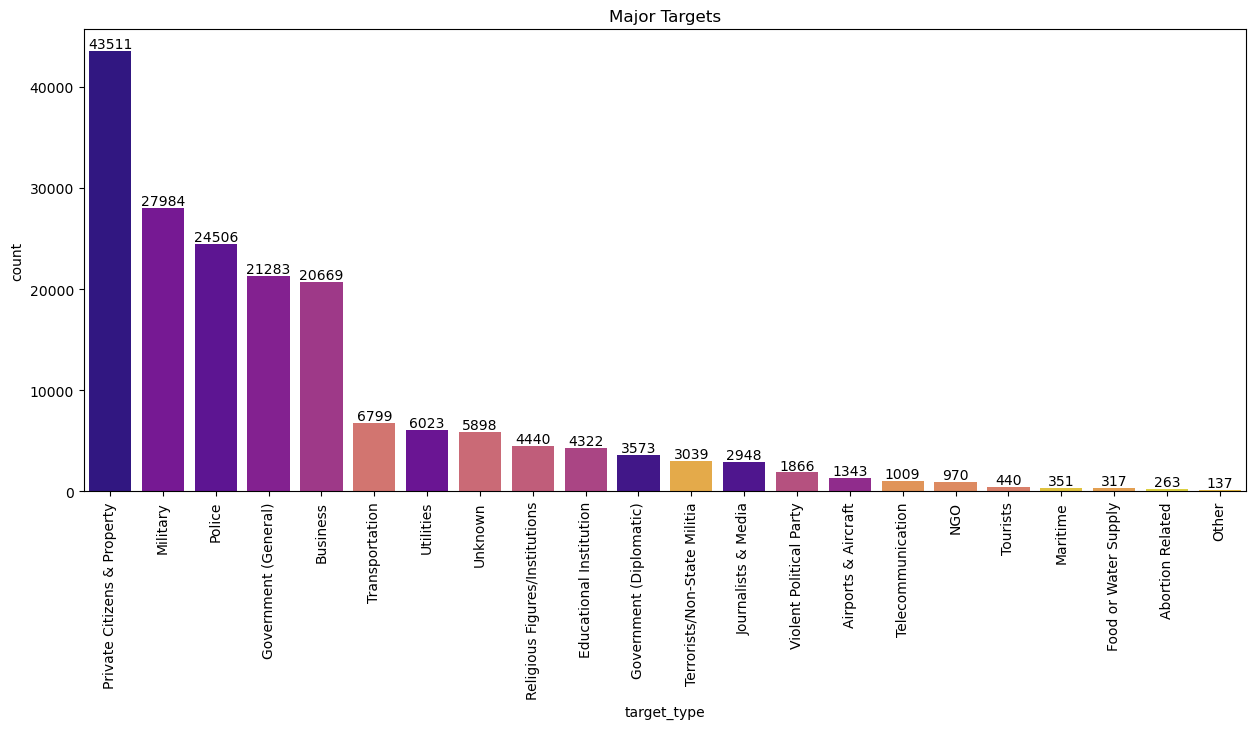

In [21]:
plt.figure(figsize=(15,6))
ax = sns.countplot(
	x='target_type', data=terror,
	hue='target_type', legend=False, palette='plasma',
	order=terror['target_type'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
    
plt.xticks(rotation=90)
plt.title("Major Targets")
plt.show()

## 🎫 3. Global Terror Attacks

◾ 지도1

In [22]:
import folium
import folium.plugins

terror_fol=terror.copy()
terror_fol.dropna(subset=['lat','lng'], inplace=True)
terror_fol = terror_fol.sort_values('nkill', ascending=False)[:5000]
location_fol=terror_fol[['lat','lng']]
country_fol=terror_fol['Country']
city_fol=terror_fol['City']
killed_fol=terror_fol['nkill']
wound_fol=terror_fol['nwound']

def color_point(x):
    if x>=1200:
        color='red'
    elif ((x>30 and x<1200)):
        color='blue'
    else:
        color='green'
    return color  

map = folium.Map(location=[30,0], tiles='CartoDB dark_matter', zoom_start=2)

for point in location_fol.index:
    info='<b>Country: </b>' + str(country_fol[point]) + \
            '<br><b>City: </b>: ' + str(city_fol[point]) + \
            '<br><b>Killed </b>: ' + str(killed_fol[point]) + \
            '<br><b>Wounded</b> : ' + str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=100)
    folium.CircleMarker(list(location_fol.loc[point].values),
                        popup=folium.Popup(iframe),
                        radius=killed_fol[point]/100,
                        color=color_point(killed_fol[point]),
                        fill=True, fill_opacity=0.7
                    ).add_to(map)
map

# The color and size of each point is according to the number of people killed in the attack. 
# Click on each point to get more information about the attack.

◾ 지도2

In [23]:
import numpy as np
import folium

terror_killed_sort = terror.sort_values('nkill', ascending=False)[:100]

map2 = folium.Map(location=[30,0], tiles='CartoDB dark_matter', zoom_start=2)

for _, row in terror_killed_sort.iterrows():
    if ~np.isnan(row['lat']):
        folium.CircleMarker(location=[row['lat'], row['lng']],
                            radius=row['nkill']/100, color='red',
                            fill=True, fill_opacity=0.7).add_to(map2)
map2

## 🎫 4. Terrorism By Region

◾ 지역별 테러 발생수

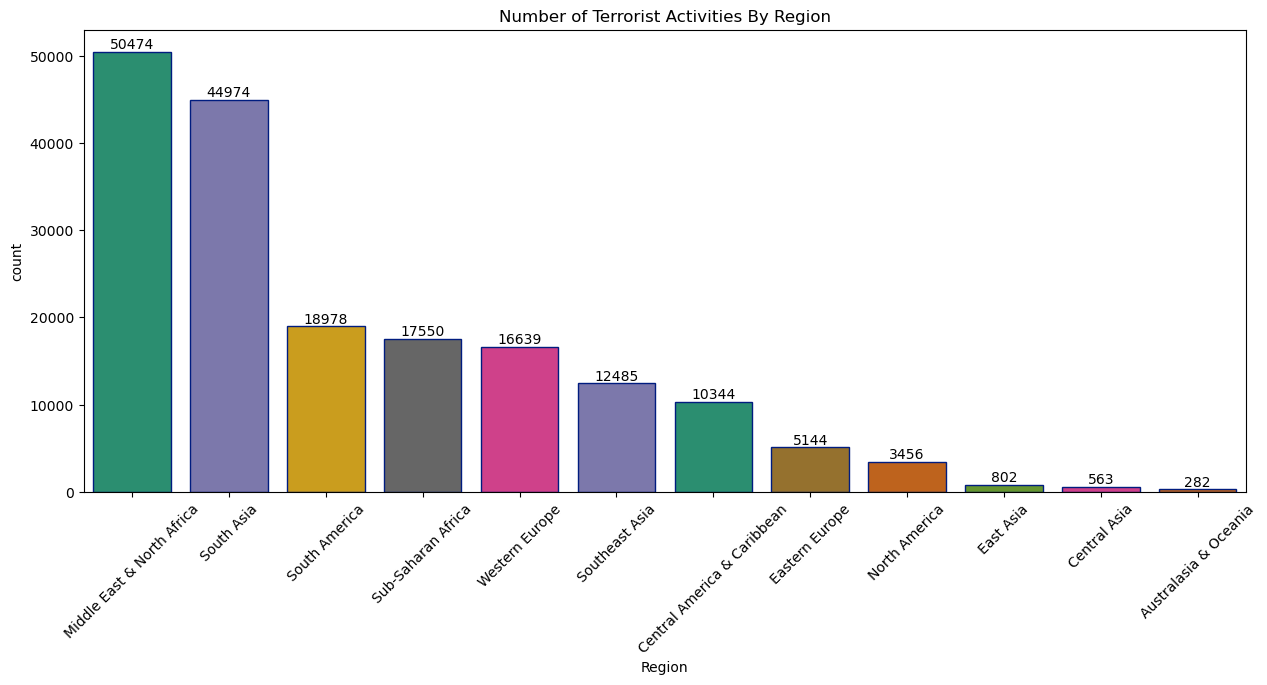

In [24]:
plt.figure(figsize=(15,6)) # 'c'
ax = sns.countplot(
	x='Region', data=terror, hue='Region', legend=False, palette='Dark2',
	edgecolor=sns.color_palette('dark',5),
	order=terror['Region'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
plt.xticks(rotation=45)
plt.title('Number of Terrorist Activities By Region')
plt.show()

# Middle East and North Africa are the most terrorism prone regions followed by South Asia. 
# The Australian Region have experienced very few terrorist events. 
# Collectively we can say that The African and Asian Continent experience the highest terrorist attacks. 
# But why are these regions prone to terrorism? Does this have any relation to the mindset of the people? or any other reason??

In [25]:
terror_region = pd.crosstab(terror.year, terror.Region)
terror_region

Region  Australasia & Oceania  Central America & Caribbean  Central Asia  \
year                                                                       
1970                        1                            7             0   
1971                        1                            5             0   
1972                        8                            3             0   
1973                        1                            6             0   
1974                        1                           11             0   
1975                        0                            9             0   
1976                        0                           45             0   
1977                        0                           24             0   
1978                        2                          199             0   
1979                        2                          609             0   
1980                        7                         1070             0   
1981                        3                         1148             0   
1982                        2                          996             0   
1983                        0                          858             0   
1984                       11                          681             0   
1985                        7                          780             0   
1986                        4                          393             0   
1987                        3                          566             0   
1988                       12                          495             0   
1989                       29                          503             0   
1990                       18                          316             0   
1991                       10                          729             7   
1992                       17                          212            77   
1994                       14                          180            65   
1995                       18                          168            55   
1996                       19                          116            33   
1997                        7                          117            49   
1998                        6                            1            25   
1999                        4                            8            24   
2000                        6                           14            21   
2001                        4                            8            18   
2002                        2                            3             6   
2003                        4                            8             7   
2004                        0                            5             8   
2005                        0                            3            11   
2006                        2                            5             6   
2007                        1                            4             4   
2008                        8                            0            36   
2009                        1                            9            31   
2010                        1                            1             9   
2011                        0                            1             9   
2012                        0                            1            12   
2013                        1                           14             7   
2014                        9                            5             9   
2015                       14                            1            10   
2016                       10                            3            17   
2017                       12                            4             7   

Region  East Asia  Eastern Europe  Middle East & North Africa  North America  \
year                                                                           
1970            2              12                          28            472   
1971            1               5  

◾ 지역별 테러 발생 경향

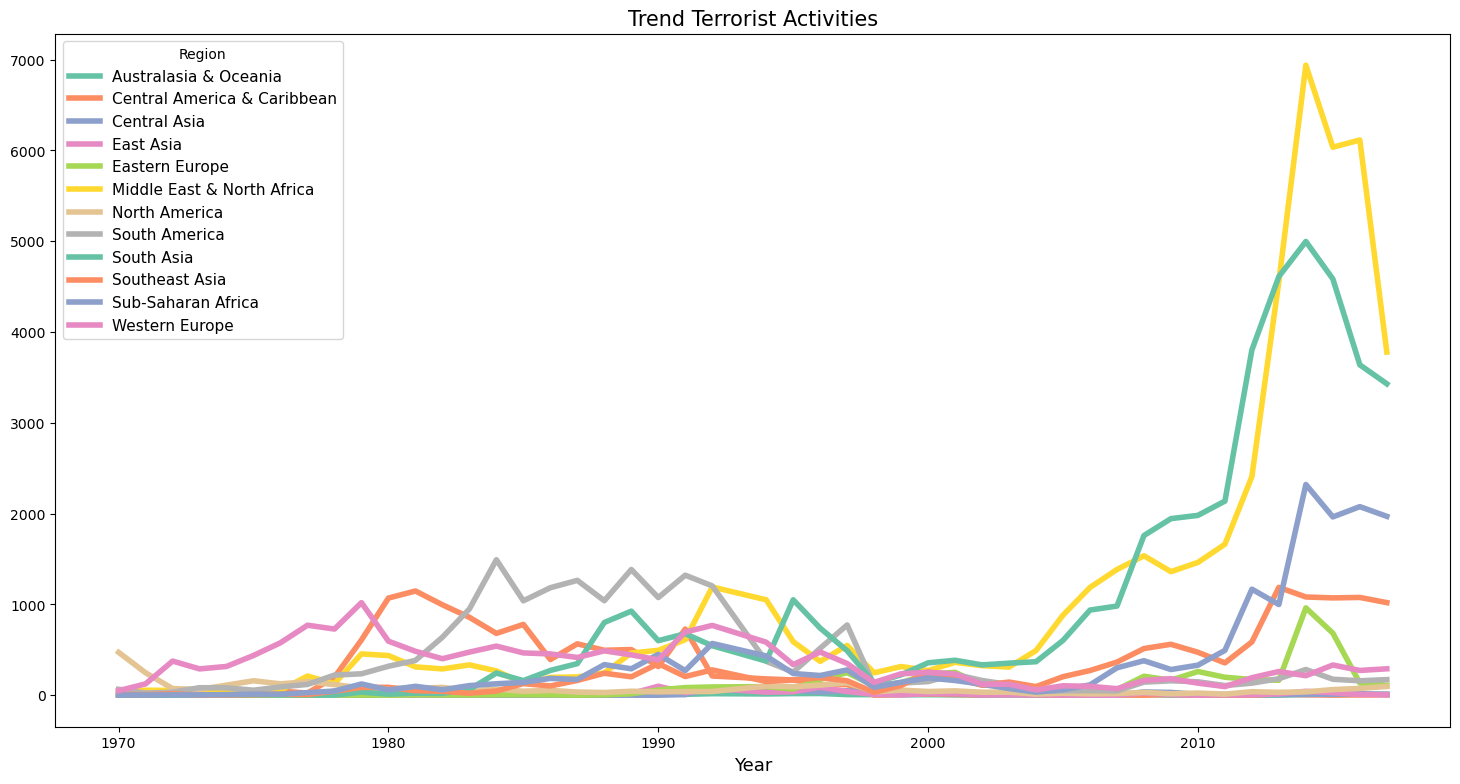

In [26]:
terror_region.plot(color=sns.color_palette('Set2', ), lw=4)
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.legend(title='Region', fontsize=11)
plt.title("Trend Terrorist Activities", fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

# Middle-East,North Africa,South Asia have seen a shoot in the number of terrorist activities over the years.

◾ 지역별 공격 형태

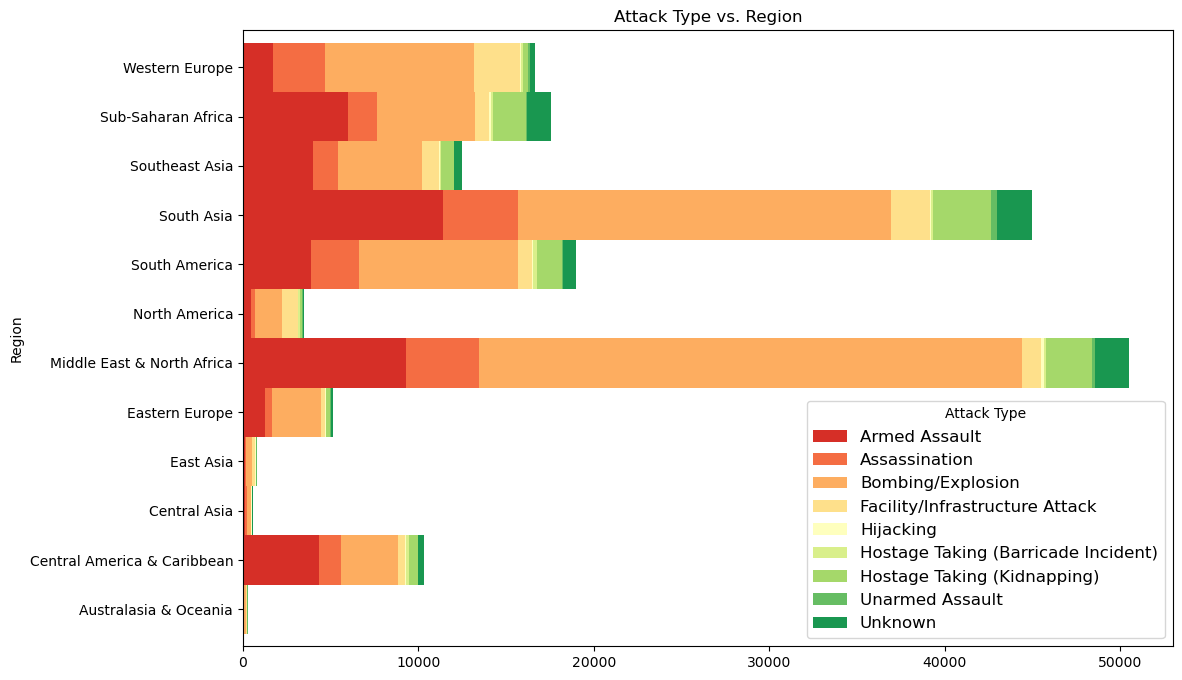

In [27]:
pd.crosstab(terror.Region, terror.attack_type).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn', 9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Attack Type vs. Region')
plt.legend(title='Attack Type', fontsize=12)
plt.show()

# Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

◾ 테러 공격을 가장 많이 받은 TOP15

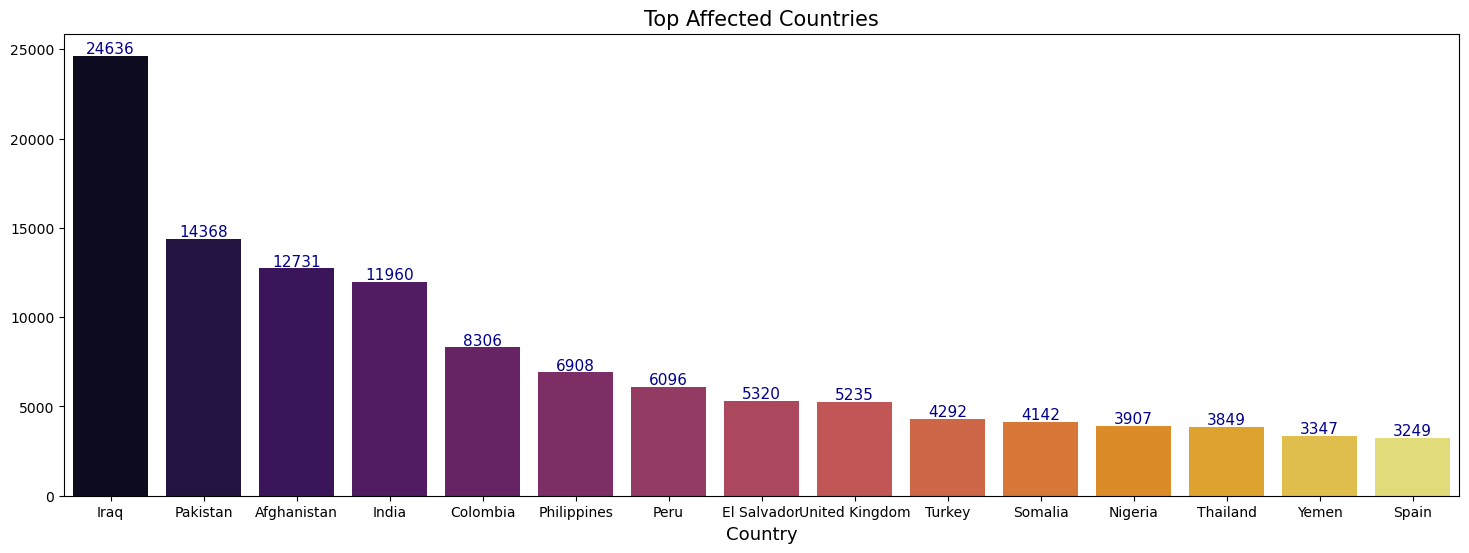

In [28]:
plt.figure(figsize=(18,6))
countries = terror['Country'].value_counts()[:15].index
ax = sns.barplot(
	x=countries, y=terror['Country'].value_counts()[:15].values,
	hue=countries, legend=False, palette='inferno'
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points',
		fontsize=11, color='darkblue'
	)
plt.title('Top Affected Countries', fontsize=15)
plt.xlabel("Country", fontsize=13)
plt.show()

# Iraq has witnessed a very large number of terrorist activities followed by Pakistan. 
# One thing to note is the countries with highest attacks, are mostly densely populated countries, 
# thus it will eventually claim many lives. Let's check

In [29]:
count_terror = terror['Country'].value_counts()[:15].to_frame()
count_terror.columns = ['Attacks']
count_terror

Attacks
Country                
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249

In [30]:
terror[['nkill', 'nwound', 'casualties']] = terror[['nkill', 'nwound', 'casualties']].astype('int64')

In [31]:
count_kill = terror.groupby('Country')['nkill'].sum().to_frame()
count_kill

nkill
Country           
Afghanistan  39384
Albania         42
Algeria      11066
Andorra          0
Angola        3043
...            ...
Yemen         8776
Yugoslavia     119
Zaire          324
Zambia          70
Zimbabwe       154

[205 rows x 1 columns]

In [32]:
count_terror.merge(count_kill, left_index=True, right_index=True, how='left')

Attacks  nkill
Country                       
Iraq              24636  78589
Pakistan          14368  23822
Afghanistan       12731  39384
India             11960  19341
Colombia           8306  14698
Philippines        6908   9559
Peru               6096  12771
El Salvador        5320  12053
United Kingdom     5235   3410
Turkey             4292   6888
Somalia            4142  10273
Nigeria            3907  22682
Thailand           3849   2742
Yemen              3347   8776
Spain              3249   1288

◾ TOP15 국가별 테러 수 vs 사망자

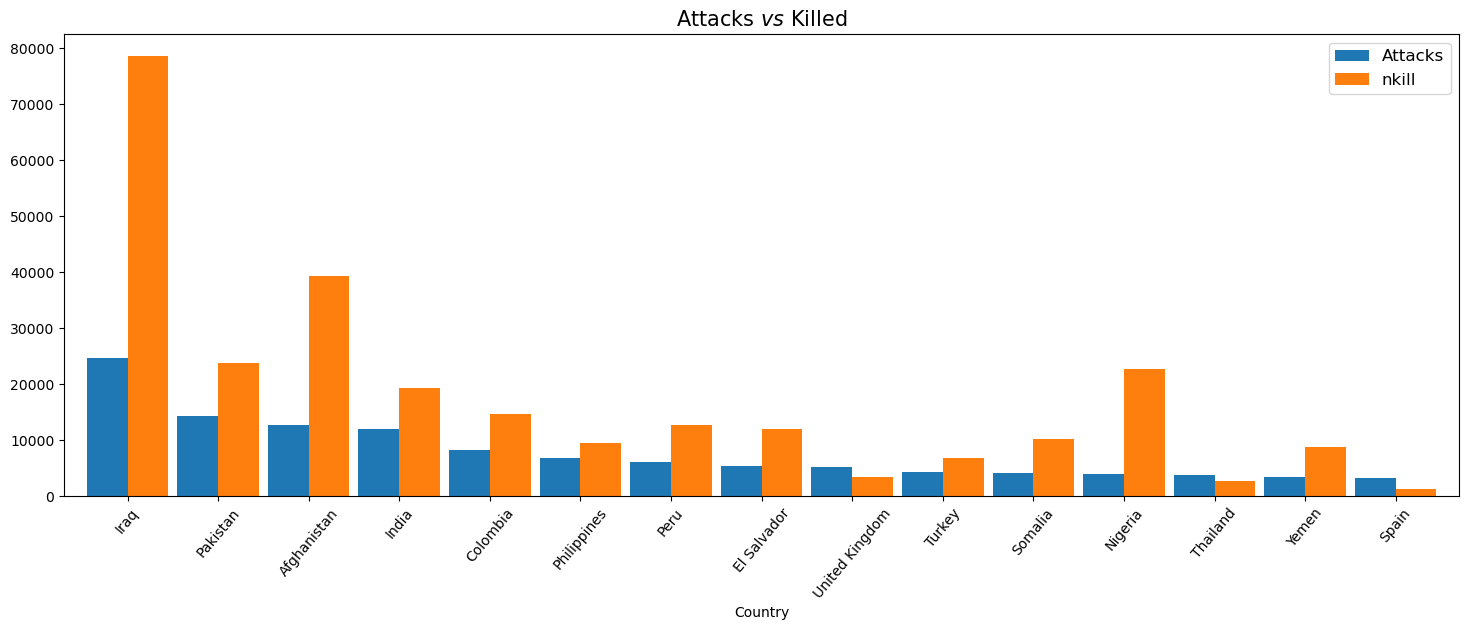

In [33]:
count_terror.merge(
	count_kill, left_index=True, right_index=True, how='left'
).plot.bar(width=0.9)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attacks $vs$ Killed', fontsize=15)
plt.legend(fontsize=12)
plt.xticks(rotation=50)
plt.show()

# Damn!! Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq. 
# Thus the densely populated theory holds good.

## 🎫 5. Most Notorious Group

In [34]:
perpetrator_group = terror['perp_group'].value_counts()[1:15].to_frame().reset_index() # [0] Unknown
perpetrator_group

perp_group  count
0                                            Taliban   7478
1        Islamic State of Iraq and the Levant (ISIL)   5613
2                                  Shining Path (SL)   4555
3   Farabundo Marti National Liberation Front (FMLN)   3351
4                                         Al-Shabaab   3288
5                            New People's Army (NPA)   2772
6                        Irish Republican Army (IRA)   2671
7      Revolutionary Armed Forces of Colombia (FARC)   2487
8                                         Boko Haram   2418
9                     Kurdistan Workers' Party (PKK)   2310
10               Basque Fatherland and Freedom (ETA)   2024
11    Communist Party of India - Maoist (CPI-Maoist)   1878
12                                           Maoists   1630
13           Liberation Tigers of Tamil Eelam (LTTE)   1606

◾ 가장 악명높은 테러 단체 순위

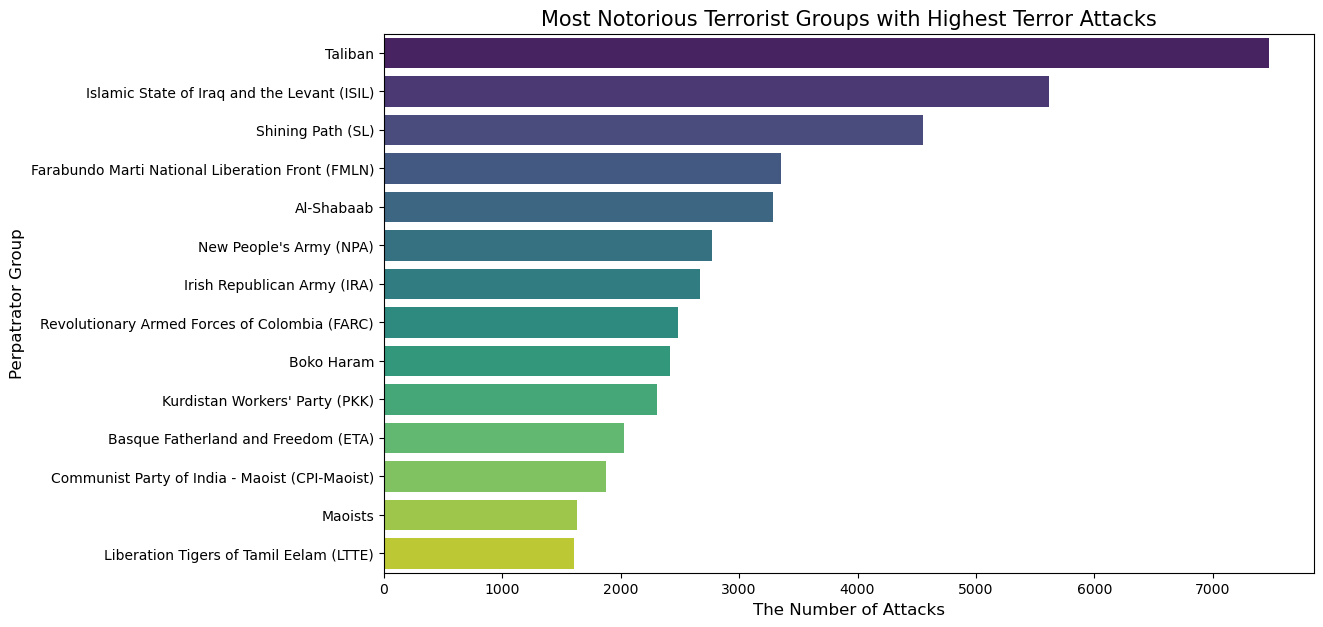

In [35]:
plt.figure(figsize=(12,7))
sns.barplot(
	x='count', y='perp_group', data=perpetrator_group,
	hue='perp_group', legend=False, palette='viridis'
)
plt.title('Most Notorious Terrorist Groups with Highest Terror Attacks', fontsize=15)
plt.xlabel('The Number of Attacks', fontsize=12)
plt.ylabel('Perpatrator Group', fontsize=12)
plt.show()

In [36]:
top10_group = terror[terror['perp_group'].isin(terror['perp_group'].value_counts()[1:11].index)]
top10_group

year  month  day         Country                      Region  \
39      1970      1   31     Philippines              Southeast Asia   
169     1970      4    2     Philippines              Southeast Asia   
364     1970      6   26  United Kingdom              Western Europe   
365     1970      6   27  United Kingdom              Western Europe   
366     1970      6   27  United Kingdom              Western Europe   
...      ...    ...  ...             ...                         ...   
181676  2017     12   31     Afghanistan                  South Asia   
181679  2017     12   31            Iraq  Middle East & North Africa   
181680  2017     12   31         Somalia          Sub-Saharan Africa   
181683  2017     12   31     Afghanistan                  South Asia   
181686  2017     12   31         Somalia          Sub-Saharan Africa   

                          City        lat         lng  nkill  nwound  \
39                      Bamban  15.675051  120.331618      0       1   
169             Mabalacat City  15.185916  120.541870      2       0   
364                Londonderry  55.011562   -7.312045      5       0   
365                Londonderry  55.011562   -7.312045      3       0   
366                    Belfast  54.607712   -5.956210      1       0   
...                        ...        ...         ...    ...     ...   
181676  Mohammad Agha district  34.217806   69.109316      5       0   
181679              Muqdadiyah  33.953167   44.921906     13       0   
181680                   Wajid   3.810951   43.246506      0       0   
181683       Kohistan district  35.315467   64.815508      6       0   
181686           Ceelka Geelow   2.359673   45.385034      1       2   

                         target_type  \
39                          Military   
169                         Military   
364     Terrorists/Non-State Militia   
365      Private Citizens & Property   
366      Private Citizens & Property   
...                              ...   
181676                        Police   
181679                      Military   
181680                      Military   
181683  Terrorists/Non-State Militia   
181686                      Military   

                                                   target  \
39                                                 Seaman   
169                                                Airmen   
364                            3 IRA members, 2 civilians   
365     William Kincaid, 28, Daniel Loughins, 32 and A...   
366                          Robert Neill, 38, protestant   
...                                                   ...   
181676                                            Vehicle   
181679                                               Post   
181680                                     Ethiopian Base   
181683                                    House of Member   
181686                                         Checkpoint   

                                         perp_group        attack_type  \
39                          New People's Army (NPA)            Unknown   
169                         New People's Army (NPA)            Unknown   
364                     Irish Republican Army (IRA)      Armed Assault   
365                     Irish Republican Army (IRA)      Armed Assault   
366                     Irish Republican Army (IRA)      Armed Assault   
...                                             ...                ...   
181676                                      Taliban  Bombing/Explosion   
181679  Islamic State of Iraq and the Levant (ISIL)      Armed Assault   
181680                                   Al-Shabaab  Bombing/Explosion   
181683                                      Taliban      Armed Assault   
181686                                   Al-Shabaab      Armed Assault   

            weapon  suicide  success  casualties  
39         Unknown        0        0           1  
169        Unknown        0        1           2  
364     Incendiary    

In [37]:
trend_group = pd.crosstab(top10_group.year, top10_group.perp_group)
trend_group

perp_group  Al-Shabaab  Boko Haram  \
year                                 
1970                 0           0   
1971                 0           0   
1972                 0           0   
1973                 0           0   
1974                 0           0   
1975                 0           0   
1976                 0           0   
1977                 0           0   
1978                 0           0   
1979                 0           0   
1980                 0           0   
1981                 0           0   
1982                 0           0   
1983                 0           0   
1984                 0           0   
1985                 0           0   
1986                 0           0   
1987                 0           0   
1988                 0           0   
1989                 0           0   
1990                 0           0   
1991                 0           0   
1992                 0           0   
1994                 0           0   
1995                 0           0   
1996                 0           0   
1997                 0           0   
1998                 0           0   
1999                 0           0   
2000                 0           0   
2001                 0           0   
2002                 0           0   
2003                 0           0   
2004                 0           0   
2005                 0           0   
2006                 0           0   
2007                 6           0   
2008                26           0   
2009                57          10   
2010                72          17   
2011               164         125   
2012               236         424   
2013               325         234   
2014               871         495   
2015               397         540   
2016               564         240   
2017               570         333   

perp_group  Farabundo Marti National Liberation Front (FMLN)  \
year                                                           
1970                                                       0   
1971                                                       0   
1972                                                       0   
1973                                                       0   
1974                                                       0   
1975                                                       0   
1976                                                       0   
1977                                                       0   
1978                                                       1   
1979                                                       0   
1980                                                     159   
1981                                                     160   
1982                                                     284   
1983                                                     320   
1984                                                     254   
1985                                                     422   
1986                                                     174   
1987                                                     209   
1988                                                     351   
1989                                                     335   
1990                                                     181   
1991                                                     492   
1992                                                       8   
1994                                                       1   
1995                                                       0   
1996                                                       0   
1997                                                       0   
1998                                                       0   
1999                                                       0   
2000                                                       0   
2001                                                       0   
2002                     

◾ 테러 단체 별 활동 정도

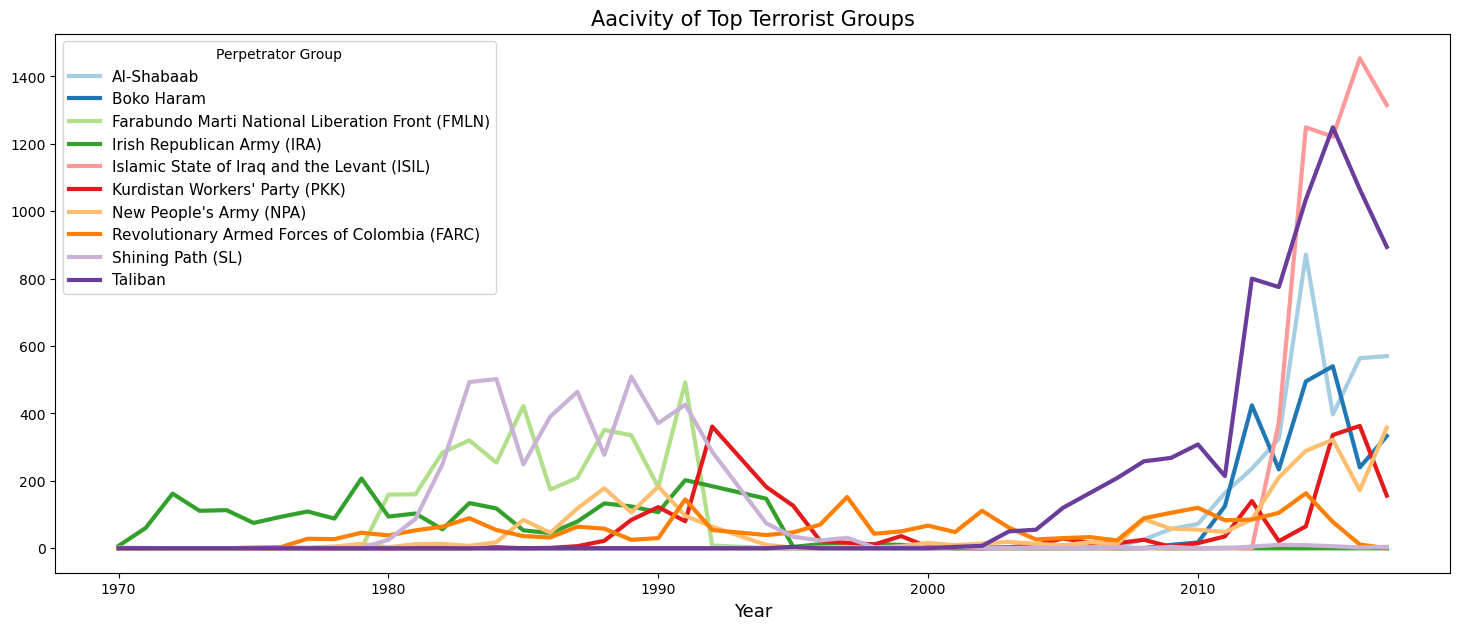

In [38]:
trend_group.plot(color=sns.color_palette('Paired'), lw=3)
fig = plt.gcf()
fig.set_size_inches(18,7)
plt.legend(title='Perpetrator Group', fontsize=11)
plt.title("Aacivity of Top Terrorist Groups", fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

# The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, maybe after the World War 2 due to the mass killing.
# However, it has probably stopped its activities in the late 90's. 
# Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.

In [39]:
# top_groups = terror[terror['perp_group'].isin(terror['perp_group'].value_counts()[:14].index)]
# group_list = list(top_groups['perp_group'].unique())

# list(top_groups[top_groups['perp_group']==group_list[0]].lat)

In [40]:
# colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']

# for i, j in zip(group_list, colors):
#     print(i, j)

# dict(zip(group_list, colors))

In [46]:
top_groups = terror[terror['perp_group'].isin(terror['perp_group'].value_counts()[:14].index)]
top_groups = top_groups.dropna(subset=['lat','lng'])
top_groups

year  month  day        Country              Region  \
2       1970      1    0    Philippines      Southeast Asia   
3       1970      1    0         Greece      Western Europe   
4       1970      1    0          Japan           East Asia   
7       1970      1    2  United States       North America   
12      1970      1    8          Italy      Western Europe   
...      ...    ...  ...            ...                 ...   
181683  2017     12   31    Afghanistan          South Asia   
181685  2017     12   31    Afghanistan          South Asia   
181686  2017     12   31        Somalia  Sub-Saharan Africa   
181689  2017     12   31          India          South Asia   
181690  2017     12   31    Philippines      Southeast Asia   

                     City        lat         lng  nkill  nwound  \
2                 Unknown  15.478598  120.599741      1       0   
3                  Athens  37.997490   23.762728      0       0   
4                 Fukouka  33.580412  130.396361      0       0   
7                 Oakland  37.791927 -122.225906      0       0   
12                   Rome  41.890961   12.490069      0       0   
...                   ...        ...         ...    ...     ...   
181683  Kohistan district  35.315467   64.815508      6       0   
181685            Maymana  35.921051   64.774544      0       4   
181686      Ceelka Geelow   2.359673   45.385034      1       2   
181689             Imphal  24.798346   93.940430      0       0   
181690      Cotabato City   7.209594  124.241966      0       0   

                         target_type                 target  perp_group  \
2                Journalists & Media               Employee     Unknown   
3            Government (Diplomatic)           U.S. Embassy     Unknown   
4            Government (Diplomatic)         U.S. Consulate     Unknown   
7                          Utilities        Edes Substation     Unknown   
12               Airports & Aircraft  Flight 802 Boeing 707     Unknown   
...                              ...                    ...         ...   
181683  Terrorists/Non-State Militia        House of Member     Taliban   
181685                      Business           Jewelry Shop     Unknown   
181686                      Military             Checkpoint  Al-Shabaab   
181689          Government (General)                 Office     Unknown   
181690                       Unknown                Unknown     Unknown   

                           attack_type      weapon  suicide  success  \
2                        Assassination     Unknown        0        1   
3                    Bombing/Explosion  Explosives        0        1   
4       Facility/Infrastructure Attack  Incendiary        0        1   
7                    Bombing/Explosion  Explosives        0        1   
12                           Hijacking    Firearms        0        1   
...                                ...         ...      ...      ...   
181683                   Armed Assault    Firearms        0        1   
181685               Bombing/Explosion  Explosives        0        1   
181686                   Armed Assault    Firearms        0        1   
181689               Bombing/Explosion  Explosives        0        0   
181690               Bombing/Explosion  Explosives        0        0   

        casualties  
2                1  
3                0  
4                0  
7                0  
12               0  
...            ...  
181683           6  
181685           4  
181686           3  
181689           0  
181690           0  

[122679 rows x 18 columns]

In [ ]:

group_list = list(top_groups['perp_group'].unique())
colors = ['tomato','red','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad']
group_color = dict(zip(group_list, colors))

map3 = folium.Map(location=[30,0], zoom_start=2)

for _, row in top_groups.iterrows():
    folium.CircleMarker(
		location=[row['lat'], row['lng']], radius=0.5,
		fill_color=group_color.get(row['perp_group']), fill_opacity=0.2, line_opacity=0.1
	).add_to(map3)

map3

# Regions Attacked By Terrorist Groups
# The map clearly shows the regions of activity by the groups. 
# ISIL is looks to be the notorious group in Iran and Iraq or broadly Middle-East. 
# Similarly Taliban is concentrated in Afghanistan and Pakistan.
# The Unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groups.

## 🎫 6. Terror Activities in India

In [ ]:
terror_india = terror[terror['Country']=='India']
terror_india_fol = terror_india.copy()
terror_india_fol.dropna(subset=['lat','lng'], inplace=True)
location_ind=terror_india_fol[['lat','lng']][:5000]
city_ind=terror_india_fol['City'][:5000]
killed_ind=terror_india_fol['nkill'][:5000]
wound_ind=terror_india_fol['nwound'][:5000]
target_ind=terror_india_fol['target_type'][:5000]

map4 = folium.Map(location=[20.59, 78.96], tiles='CartoDB dark_matter', zoom_start=4.5)
for point in location_ind.index:
    folium.CircleMarker(
        list(location_ind.loc[point].values),
        popup='<b>City: </b>' + str(city_ind[point]) + '<br><b>Killed: </b>' + str(killed_ind[point]) + \
              '<br><b>Injured: </b>' + str(wound_ind[point]) + '<br><b>Target: </b>' + str(target_ind[point]),
        radius=killed_ind[point]/100,
        color=color_point(killed_ind[point]),
        fill_color=color_point(killed_ind[point])).add_to(map4)
map4

## 🎫 7. Terror Activities in USA

- Most Notorious Groups in USA and Favorite Attack Type

In [52]:
terror['Country'].value_counts()[:20]

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: count, dtype: int64

◾ USA에서의 주요 테러 단체와 공격 형태

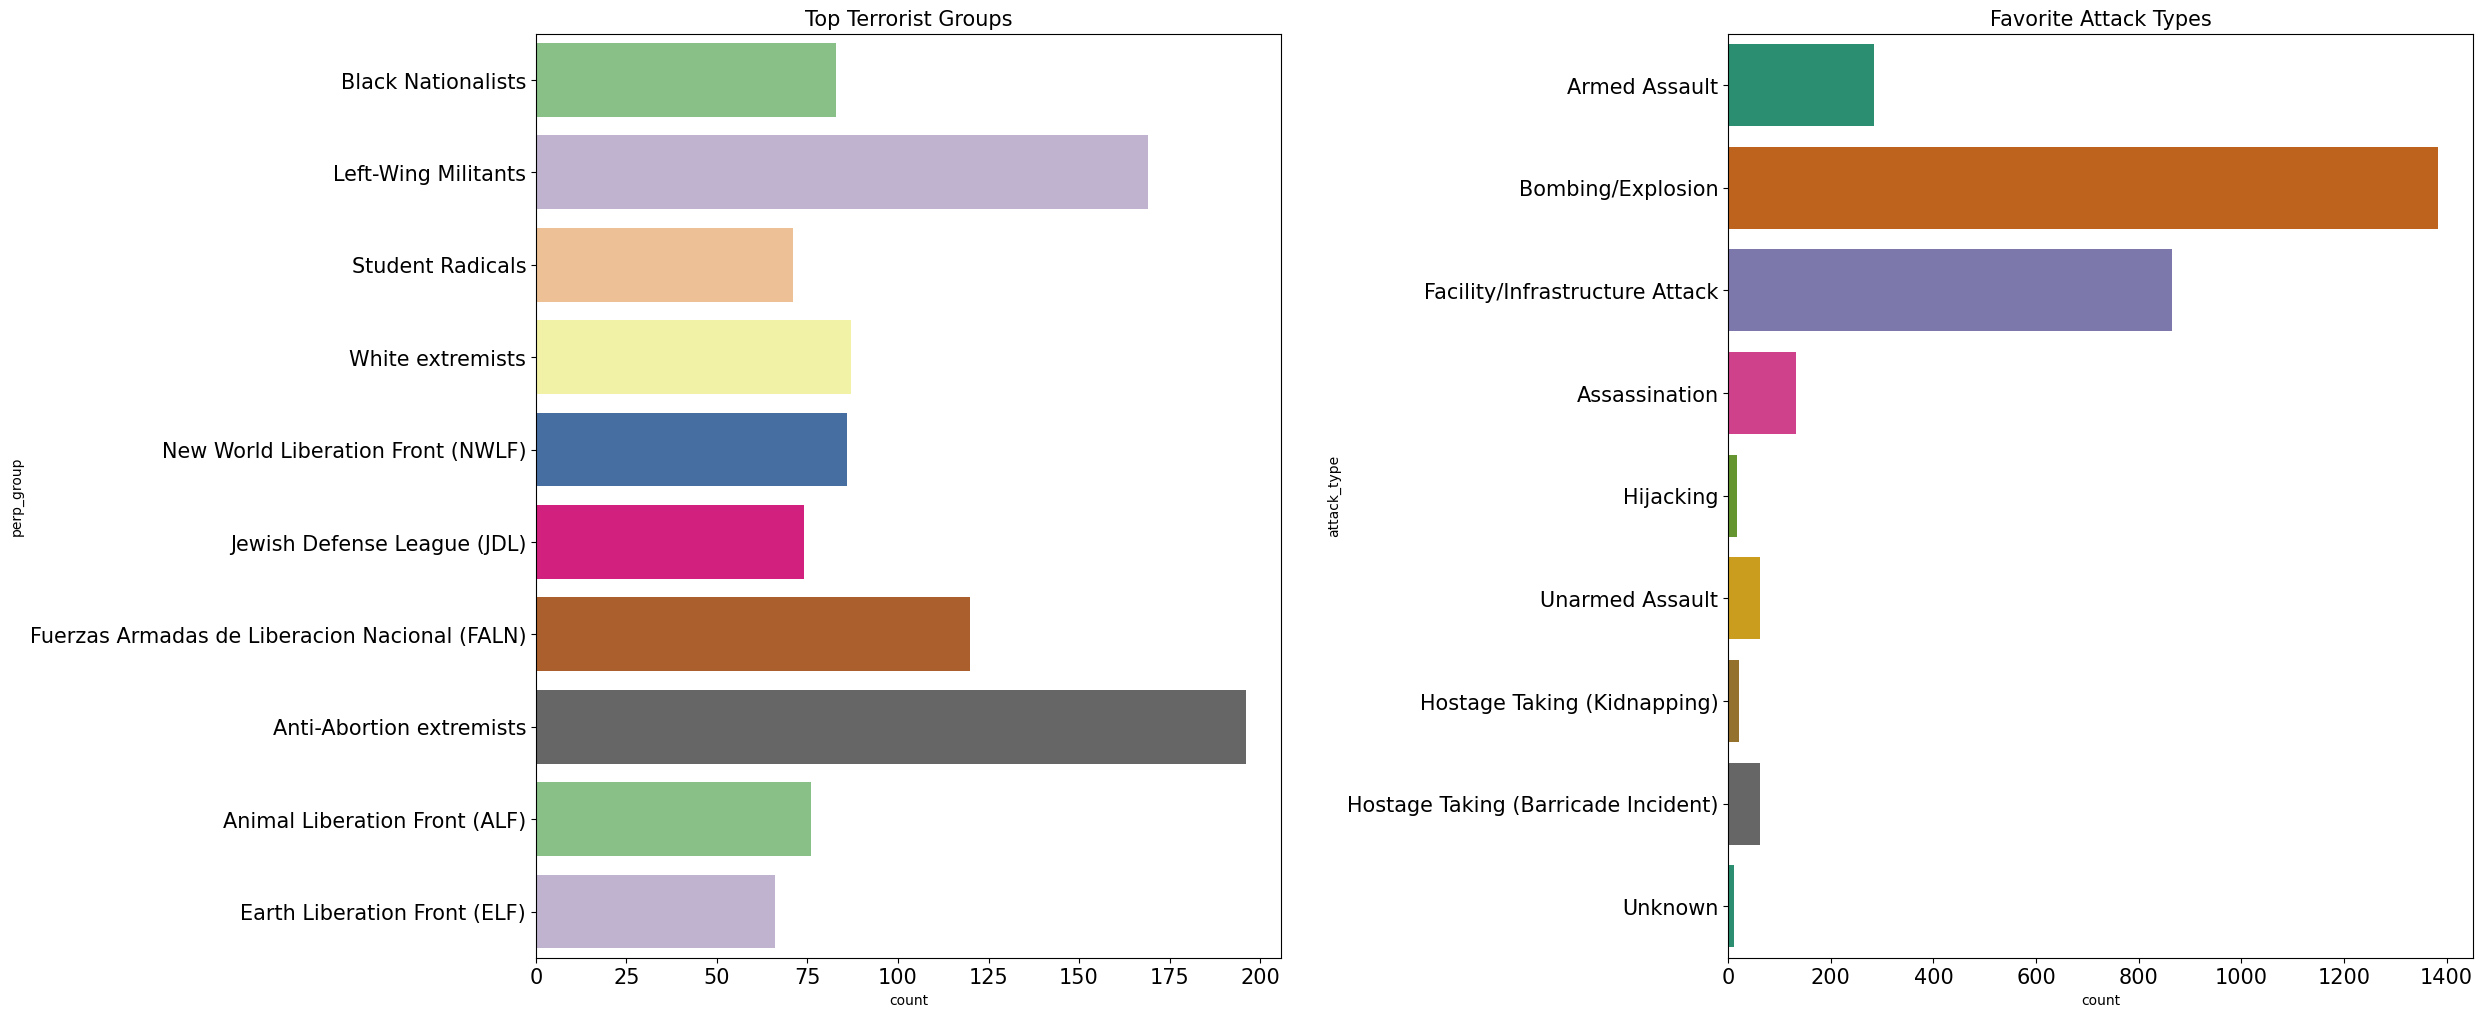

In [72]:
terror_usa = terror[terror['Country']=='United States']

f,ax=plt.subplots(1,2,figsize=(25,12))
usa_groups=terror_usa['perp_group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['perp_group'].isin(usa_groups)]
sns.countplot(y='perp_group',data=usa_groups,ax=ax[0], hue='perp_group', legend=False, palette='Accent')
sns.countplot(y='attack_type',data=terror_usa,ax=ax[1], hue='attack_type', legend=False, palette='Dark2')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups', fontsize=15)
ax[1].set_title('Favorite Attack Types', fontsize=15)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

## 🎫 8. Motive Behind Attacks

Motive simply means the reason for doing something. Now this reason may be anything, personal grudges, revolt against government, religious sentiments, etc. In this part we will try to analyse what are the main reasons behind the terrorist activities.

For this we will use NLTK for Natural Language Processing. The reason for using NLP is because if we simply take the count of words and make a wordcloud, many useless words like 'the','and,'is', etc will have the highest count as they are very common in english language. Thus using NLTK, we can filter out these words and find other important words.

In [65]:
#!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 220.2 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 226.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.5 MB 7.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   ---------------------------------------- 269.5/269.5 kB 8.4 MB/s eta 0:00:00
   ------------------

NLTK(Natural Language Toolkit)는 자연어 처리와 텍스트 분석을 위한 파이썬 라이브러리입니다. NLTK는 다양한 자연어 처리 작업을 수행할 수 있는 도구와 데이터를 제공하며, 연구, 교육 및 실제 응용 프로그램에서 널리 사용됩니다. 주요 사용 사례는 다음과 같습니다:

1. **토큰화(Tokenization)**: 문장이나 문서를 개별 단어나 문장으로 분할합니다.

2. **형태소 분석(Morphological Analysis)**: 단어를 형태소로 분리하고, 각 형태소의 품사를 태깅합니다.

3. **문장 분류(Sentence Classification)**: 주어진 문장이 긍정인지 부정인지를 판단하거나, 주제를 분류하는 작업 등에 사용됩니다.

4. **명사구 추출(Noun Phrase Extraction)**: 문장이나 문서에서 명사구를 추출하여 의미를 파악하는데 사용됩니다.

5. **어간 추출(Stemming)** 및 **표제어 추출(Lemmatization)**: 단어의 원형을 찾는 과정으로, 텍스트 데이터를 정규화하는데 사용됩니다.

6. **불용어 제거(Stopword Removal)**: 분석에 필요하지 않은 불용어를 제거하여 분석 결과를 개선하는데 사용됩니다.

7. **문서 유사도(Document Similarity)**: 문서 간의 유사도를 측정하고, 문서를 검색하거나 요약하는데 사용됩니다.

8. **언어 모델링(Language Modeling)**: 언어의 확률 분포를 모델링하여 다음 단어를 예측하는데 사용됩니다.

9. **자연어 이해(Natural Language Understanding)**: 주어진 문장이나 문서에서 정보를 추출하거나, 의도를 파악하는데 사용됩니다.

10. **기계 번역(Machine Translation)**: 한 언어에서 다른 언어로의 번역을 위한 기초적인 기능을 제공합니다.

NLTK는 학계와 산업계에서 널리 사용되는 강력한 자연어 처리 라이브러리로, 다양한 자연어 처리 작업을 효율적으로 수행할 수 있도록 도와줍니다.

In [ ]:
# # from scipy.misc import imread
# # import codecs
# import nltk
# from wordcloud import WordCloud, STOPWORDS

# motive = terror['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')

# words = nltk.tokenize.word_tokenize(motive)
# word_dist = nltk.FreqDist(words)
# stopwords = nltk.corpus.stopwords.words('english')
# words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

# # f1=open("kaggle.png", "wb")
# # f1.write(codecs.decode(kaggle,'base64'))
# # f1.close()
# # img1 = imread("kaggle.png")
# # hcmask1 = img1

# # wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))

# wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black').generate(" ".join(words_except_stop_dist))

# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

## 🎫 Animation

In [ ]:
# from matplotlib import animation,rc
# import io
# import base64
# from IPython.display import HTML, display
# from mpl_toolkits.basemap import Basemap
# import warnings
# warnings.filterwarnings('ignore')

# fig = plt.figure(figsize = (10,6))

# def animate(Year):
#     ax = plt.axes()
#     ax.clear()
#     ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
#     m6 = Basemap(projection='mill',
#                  llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20,
#                  resolution='c')
    
#     lat6=list(terror[terror['Year']==Year].latitude)
#     long6=list(terror[terror['Year']==Year].longitude)
    
#     x6, y6 = m6(long6, lat6)
#     m6.scatter(x6, y6, s=[(kill+wound)*0.1 
#                           for kill, wound in 
#                               zip(terror[terror['Year']==Year].Killed,
#                                   terror[terror['Year']==Year].Wounded)],
#                color = 'r')
    
#     m6.drawcoastlines()
#     m6.drawcountries()
#     m6.fillcontinents(zorder = 1,alpha=0.4)
#     m6.drawmapboundary()
    
# ani = animation.FuncAnimation(fig, animate, list(terror.Year.unique()), 
#                               interval = 1500)    
# ani.save('animation.gif', writer='pillow', fps=1)
# plt.close(1)

# filename = 'animation.gif'
# video = io.open(filename, 'r+b').read()
# encoded = base64.b64encode(video)
# path = '''<img src="data:image/gif;base64,{0}" type="gif" />'''
# HTML(data=path.format(encoded.decode('ascii')))